# Import package and load dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
!ls

ingredients.csv                   recette_data_analysis.ipynb
recette_data_analysis-Copy1.ipynb recipes.csv


In [9]:
ingredients=pd.read_csv("ingredients.csv")
recipes=pd.read_csv("recipes.csv")

In [10]:
pd.set_option("max_rows", 20)
pd.set_option("max_colwidth", 50)

# Display raw data recipes and ingredients dataframes

## Ingredients

In [11]:
ingredients

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578325,532201,2 plaques de saumon fumé
578326,532201,25 g de beurre
578327,532201,4 citrons verts
578328,532201,4 oeufs


## Recipes

In [12]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...
...,...,...,...,...,...
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...
70601,532213,https://www.marmiton.org/recettes/recette_grat...,Gratin pomme de terre et panais,Accompagnement,Éplucher les pommes de terre et le panais et l...


# Exploration of recipes

In [13]:
def fastcheck(data):
    print('Data shape:\n',data.shape,\
          '\n\nColumns name:\n',list(data.columns),\
          '\n\nDatas type:\n',data.dtypes,'\n\nNull data:\n',\
          data.isnull().sum().sort_values(ascending=False)/len(data)*100)
    if data.duplicated().sum() > 0:
        print(f'\n\n{data.duplicated().sum()} duplicated data',\
              '\n\nDuplicated data:\n',data.duplicated())
        print('\n\nDrop duplicates ? (y/n)')
        ans = input()
        if ans.lower() == 'y':
            data = data.drop_duplicates()
            print('\nNew data shape:\n',data.shape)
    else:
        print('No duplicate')
    data.sample(10)
    return data

## Check recipes  : 70 603 rows with 18 duplicates (<0,03%)  and 0 null

In [14]:
recipes=fastcheck(recipes)

Data shape:
 (70603, 5) 

Columns name:
 ['recipe_id', 'recipe_url', 'recipe_title', 'recipe_type', 'recipe_steps'] 

Datas type:
 recipe_id        int64
recipe_url      object
recipe_title    object
recipe_type     object
recipe_steps    object
dtype: object 

Null data:
 recipe_id       0.0
recipe_url      0.0
recipe_title    0.0
recipe_type     0.0
recipe_steps    0.0
dtype: float64


18 duplicated data 

Duplicated data:
 0        False
1        False
2        False
3        False
4        False
         ...  
70598    False
70599    False
70600    False
70601    False
70602     True
Length: 70603, dtype: bool


Drop duplicates ? (y/n)
y

New data shape:
 (70585, 5)


## Check recipe_steps (=instructions) format

### Add number of sentences in recipes in new column

In [15]:
enriched_recipes=recipes.copy()
#Count the number of sentences using punctuation "." and store it in field nb_sentences
#Warning : assumes that each sentence ends with "." (! or no punctuation is not counted)
enriched_recipes["nb_sentences"]=enriched_recipes["recipe_steps"].apply(lambda x: x.count("."))


In [16]:
enriched_recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7
...,...,...,...,...,...,...
70597,532440,https://www.marmiton.org/recettes/recette_ciga...,Cigare au poulet et au chèvre,Plat principal,Dénerver et couper le poulet en fines lamelles...,5
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...,14
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...,15
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...,11


### Median of 8 sentences by instruction (based on "." occurence)

nb_sentences    8.0
dtype: float64

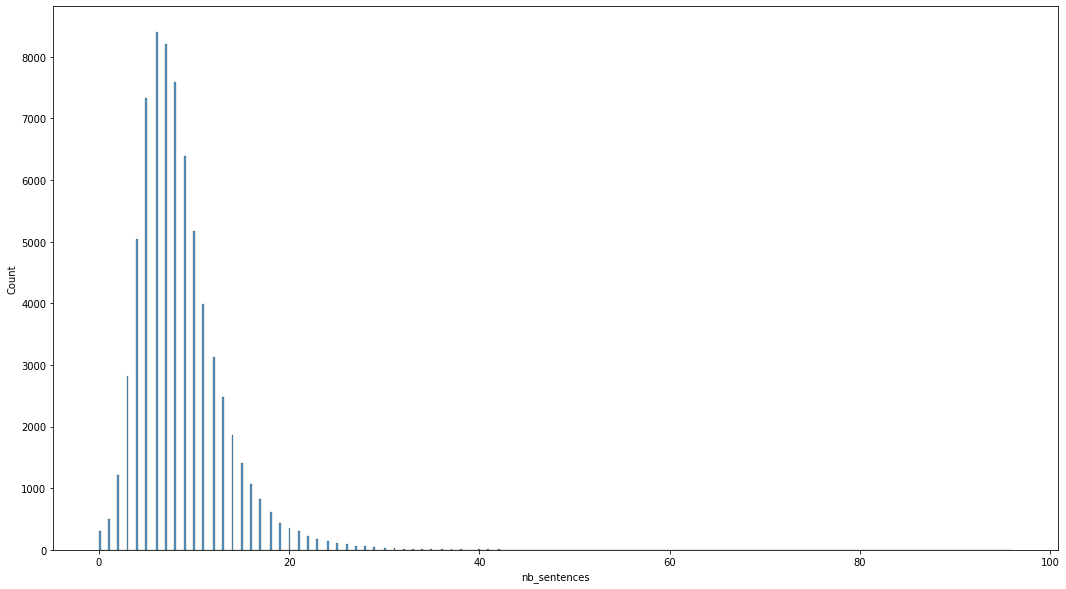

In [17]:
plt.figure(figsize=(18, 10))
sns.histplot(enriched_recipes['nb_sentences'])#, kde=True);
enriched_recipes[['nb_sentences']].median()

In [18]:
enriched_recipes.query("nb_sentences == 0")

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
106,10717,https://www.marmiton.org/recettes/recette_sole...,Soleil d'Hawaii,Soleil d'hawaii,- Battre les 4 jaunes d'oeufs \n\n - Ajouter l...,0
979,12001,https://www.marmiton.org/recettes/recette_sauc...,Sauce / marinade Teriyaki,Sauce salée,Mélanger simplement tous les ingrédients !,0
1517,12776,https://www.marmiton.org/recettes/recette_sauc...,"Sauce pour salade figues, foie gras et noix",Sauce salée,Une simple émulsion et le tour est joué !,0
2086,13516,https://www.marmiton.org/recettes/recette_glac...,Glace à la banane,Dessert,"Passer tout ça au mixer, et faire prendre en s...",0
...,...,...,...,...,...,...
70170,530227,https://www.marmiton.org/recettes/recette_poiv...,Poivron farcis veggy,Plat principal,"Coupez vos poivrons en deux, épépinez les et b...",0
70335,530831,https://www.marmiton.org/recettes/recette_cook...,Cookies fourrés à la pâte a tartiner maison by...,Dessert,Mettre les noisettes a torréfier au four à 160...,0
70464,531305,https://www.marmiton.org/recettes/recette_spri...,St-Germain Spritz,Apéritif ou buffet,Mettre les glaçons dans le verre \n\n Verser t...,0
70489,531692,https://www.marmiton.org/recettes/recette_tort...,Tortilla de riz au poulet et mozzarella de Fré...,Tortilla de riz au poulet et mozzarella de fré...,Faire cuire le riz 10 à 15min dans une cassero...,0


In [21]:
list(enriched_recipes.query("recipe_id==530831").iloc[:,4])

["Mettre les noisettes a torréfier au four à 160°C pendant 20 minutes \n\n Mixer les 100g de noisettes jusqu'a obtention d'une pâte  \n\n Ajouter les chocolats dans le mixeur \n\n Faire bouillir la crème et sucre  \n\n Verser progressivement la crème bouillante sur les chocolats tout en mixant  \n\n Mouler dans des moules en silicone rond de 4cm de diamètre la préparation et réservé la pendant minimum 2h au congélateur  \n\n Pour les cookies, mélanger le sucre muscovado, la poudre de noisette et le beurre pommade jusqu'a obtenir un mélange homogène \n\n Ajouter l'oeuf  \n\n Ajouter la farine, la levure chimique et le sel \n\n Concasser les noisettes et le chocolat  \n\n Ajouter les au mélange précédent \n\n Diviser la pâte à cookies en boules de 50g \n\n Démouler les inserts de pâte a tartiner et placer un insert au milieux de chaque cookies \n\n Façonner les cookies de manière a enfermer l'insert de pâte a tartiner a l'intérieur du cookie bien hermétiquement  \n\n Disposer vos cookies

### Random check of instructions format

In [50]:
recipes_sample=recipes.sample(500)
for i in range(10):
    print(f"\n---> RECETTE : {recipes_sample.iloc[i,2]} :\n")
    print(f"{recipes_sample.iloc[i,4].count('.')} phrases"
         )

    print(recipes_sample.iloc[i,4])


---> RECETTE : Crème de banane au Cooking Chef :

5 phrases
Épluchez, puis coupez les bananes en petits morceaux. Déposez-les dans la cuve de votre Cooking Chef. Arrosez de jus de citron, ajoutez le reste des ingrédients, puis mixez avec le blender sur la sortie ultra rapide / 30 sec / 0 °C /  vit. 1 à max.  

 Dégustez immédiatement ou placez au frais pendant 15 minutes maximum.

---> RECETTE : Gâteau à la crème de citron et petits beurre :

7 phrases
Préchauffer le four à 150°C (Thermostat 5). 

 Placer la crème liquide au congélateur. 

 Ecraser les gâteaux avec un rouleau (dans un sac plastique), faire fondre le beurre et mélanger avec les biscuits dans le fond du plat, placer au four 8 min. 

 Sortir et laisser refroidir le plat. 

 Presser le jus de citron, mettre les zestes et le lait concentré sucré et mélanger doucement.  

 Battre la crème au batteur, ajouter doucement le mélange citron/zestes/lait. 

 Mettre la crème sur les biscuits et placer le moule au frigo.

---> RECET

### Check recipe_type

In [51]:
#It is expected 9 recipe_type, but we have 25155 !!
print(recipes.recipe_type.nunique())

25155


(38291, 5)
(70585, 5)


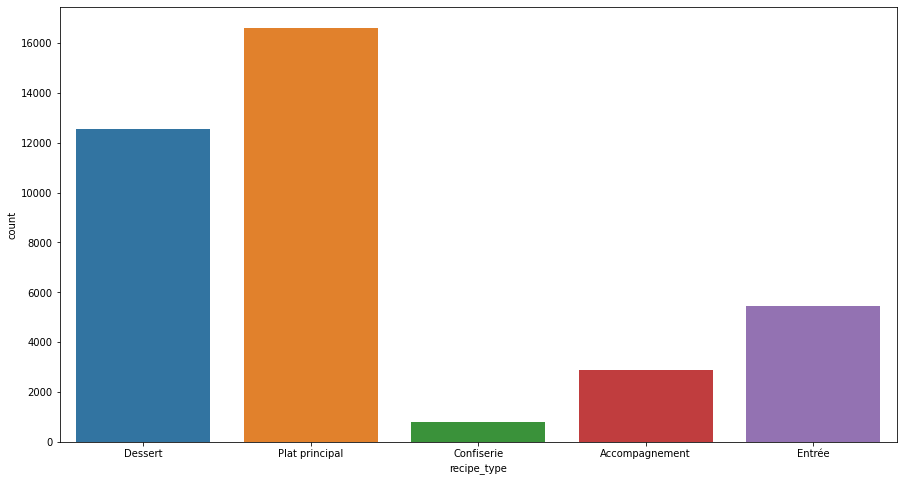

In [52]:
known_types=["Entrée", "Plat principal", "Dessert", "Amuse-gueule", "Accompagnement", "Sauce", "Boisson", "Confiserie", "Conseil"]
mask = recipes['recipe_type'].isin(known_types)
recipes[mask]

plt.figure(figsize=(15,8))
sns.countplot(x="recipe_type", data=recipes[mask])

# En dropant tous les types non-connus on réduit le dataset presque de moitié : 70 585 -> 38 291

print(recipes[mask].shape)
print(recipes.shape)


# Exploration of ingredients

## Check ingredients : 578 330 rows with 2 694 duplicates (<0,5%) and 0 null

In [51]:
ingredients_new=fastcheck(ingredients)

Data shape:
 (575636, 2) 

Columns name:
 ['recipe_id', 'ingredient'] 

Datas type:
 recipe_id      int64
ingredient    object
dtype: object 

Null data:
 recipe_id     0.0
ingredient    0.0
dtype: float64
No duplicate


In [52]:
ingredients_new

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578316,532213,75 g de beurre
578317,532213,pain rassis
578318,532213,muscade rapée
578319,532213,50 g de beurre


In [53]:
temp=ingredients.groupby("recipe_id").count().sort_values("ingredient")

In [54]:
temp

,ingredient
recipe_id,
392279,1
27423,1
371695,1
313713,1
29439,1
...,...
33107,37
337257,38
223949,39


In [63]:
temp.query("ingredient==2")

,ingredient
recipe_id,
169557,2
65924,2
72451,2
25795,2
345617,2
...,...
59298,2
27198,2
66065,2


In [65]:
ingredients.query("recipe_id==65924")

,recipe_id,ingredient
309837,65924,5 belles tranches de saumon fumé
309838,65924,1 boursin ail et fines herbes


# # On drop moins de 2 ingrédients et plus que 10 -> reste 388 342 rows

In [111]:
def resample_ingredients(ingredients,min_ingredient=2, max_ingredient=10):
    temp=ingredients.groupby("recipe_id").count()
    temp=temp.query(f"{min_ingredient}<=ingredient<={max_ingredient}")
    return ingredients[ingredients["recipe_id"].isin(temp.index)]

In [113]:
output2=resample_ingredients(ingredients)
output2

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578260,532439,200 g d' éclats d’amandes grillées
578261,532439,35 crêpes dentelles
578262,532439,1 café serré
578263,532439,4 crêpes dentelles


ingredient    8.0
dtype: float64

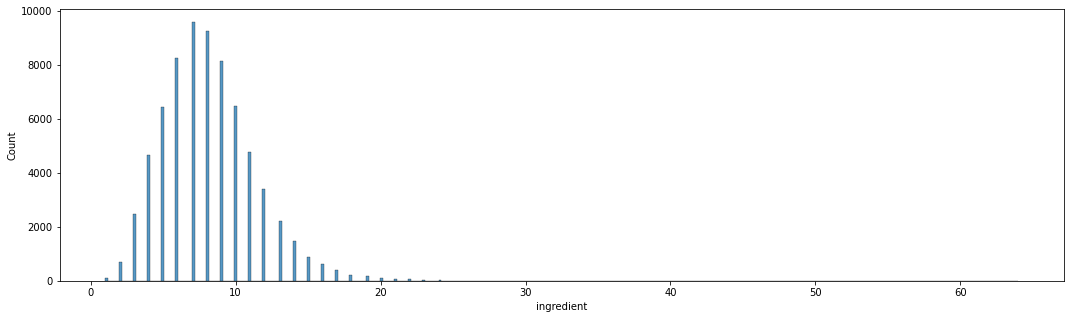

In [62]:
plt.figure(figsize=(18, 5))
sns.histplot(temp['ingredient'])#, kde=True);
temp[['ingredient']].median()

In [57]:
df_temp = df_temp.drop_duplicates()
df_temp


,recipe_id,ingredient
391742,164973,tomate
391743,164973,olives
391744,164973,champignon
391745,164973,poivre vert
391746,164973,fromage
...,...,...
391951,164973,mozzarella
391952,164973,ricotta
391953,164973,feta
391958,164973,roquefort


# TODO analyse des données (pourcentage sucré et salé, nombre d'ingrédients, taille moyenne recette, recette 1 seul ingrédient, recette pas d'ingrédient), enlever les instructions inférieurs à 1 phrase (ou un mot, ou autre critere)